<a href="https://colab.research.google.com/github/GustavoAdolfoGuizaWalteros/Deep_Learning/blob/main/P1_trabajo_1er_corte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fsspec
!pip install beautifulsoup4

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #normalizar datos
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #graficar 3D

import requests                           # manejar pedidos internet
from bs4 import BeautifulSoup             # parsear documentos HTML

from sklearn.decomposition import PCA   # Análisis de componentes principales

#configuraciones basicas PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [30]:
nasdaq_acciones = pd.read_csv('NASDAQ.csv')
nasdaq_acciones.head(1260)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-26,5275.729980,5282.270020,5254.959961,5257.490234,5257.490234,1669520000
1,2016-09-27,5254.180176,5306.810059,5251.319824,5305.709961,5305.709961,1751060000
2,2016-09-28,5312.729980,5320.620117,5284.839844,5318.549805,5318.549805,1785470000
3,2016-09-29,5311.310059,5317.000000,5254.520020,5269.149902,5269.149902,1941170000
4,2016-09-30,5288.870117,5325.879883,5277.879883,5312.000000,5312.000000,2059800000
...,...,...,...,...,...,...,...
1254,2021-09-20,14758.139648,14841.820313,14530.070313,14713.900391,14713.900391,4860630000
1255,2021-09-21,14803.360352,14847.030273,14696.469727,14746.400391,14746.400391,4056340000
1256,2021-09-22,14800.589844,14950.120117,14767.009766,14896.849609,14896.849609,4229870000
1257,2021-09-23,14960.000000,15085.440430,14932.509766,15052.240234,15052.240234,4176520000


In [31]:
nasdaq_acciones.info()
nasdaq_acciones.describe()
nasdaq_acciones.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
nasdaq_acciones = nasdaq_acciones.dropna()
nasdaq_acciones = nasdaq_acciones.reset_index(drop=True)

In [33]:
nasdaq_acciones['Date']=pd.to_datetime(nasdaq_acciones['Date'])         
nasdaq_acciones.head(1260)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-26,5275.729980,5282.270020,5254.959961,5257.490234,5257.490234,1669520000
1,2016-09-27,5254.180176,5306.810059,5251.319824,5305.709961,5305.709961,1751060000
2,2016-09-28,5312.729980,5320.620117,5284.839844,5318.549805,5318.549805,1785470000
3,2016-09-29,5311.310059,5317.000000,5254.520020,5269.149902,5269.149902,1941170000
4,2016-09-30,5288.870117,5325.879883,5277.879883,5312.000000,5312.000000,2059800000
...,...,...,...,...,...,...,...
1254,2021-09-20,14758.139648,14841.820313,14530.070313,14713.900391,14713.900391,4860630000
1255,2021-09-21,14803.360352,14847.030273,14696.469727,14746.400391,14746.400391,4056340000
1256,2021-09-22,14800.589844,14950.120117,14767.009766,14896.849609,14896.849609,4229870000
1257,2021-09-23,14960.000000,15085.440430,14932.509766,15052.240234,15052.240234,4176520000


In [34]:
nasdaq_acciones = nasdaq_acciones[['Date', 'Open', 'Close']]
nasdaq_acciones.head(1260)

,Date,Open,Close
0,2016-09-26,5275.729980,5257.490234
1,2016-09-27,5254.180176,5305.709961
2,2016-09-28,5312.729980,5318.549805
3,2016-09-29,5311.310059,5269.149902
4,2016-09-30,5288.870117,5312.000000
...,...,...,...
1254,2021-09-20,14758.139648,14713.900391
1255,2021-09-21,14803.360352,14746.400391
1256,2021-09-22,14800.589844,14896.849609
1257,2021-09-23,14960.000000,15052.240234


In [35]:
#Verificamos que se halla convertido la variable
nasdaq_acciones.info()
nasdaq_acciones.describe()
nasdaq_acciones.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Open    1259 non-null   float64       
 2   Close   1259 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 29.6 KB


Date     0
Open     0
Close    0
dtype: int64

In [36]:
nasdaq_acciones = nasdaq_acciones.set_index('Date').resample('W').last()
nasdaq_acciones.head(1260)

,Open,Close
Date,,
2016-10-02,5288.870117,5312.000000
2016-10-09,5314.919922,5292.399902
2016-10-16,5241.259766,5214.160156
2016-10-23,5238.649902,5257.399902
2016-10-30,5203.700195,5190.100098
...,...,...
2021-08-29,14969.769531,15129.500000
2021-09-05,15313.410156,15363.519531
2021-09-12,15332.919922,15115.490234


In [37]:
start = nasdaq_acciones.iloc[0]  
returns = (nasdaq_acciones - start) / start
returns

,Open,Close
Date,,
2016-10-02,0.000000,0.000000
2016-10-09,0.004925,-0.003690
2016-10-16,-0.009002,-0.018419
2016-10-23,-0.009495,-0.010279
2016-10-30,-0.016104,-0.022948
...,...,...
2021-08-29,1.830429,1.848174
2021-09-05,1.895403,1.892229
2021-09-12,1.899092,1.845537


In [38]:
def plot_stock(symbol, nasdaq_acciones=nasdaq_acciones):
    nasdaq_acciones[symbol].plot(alpha=2);

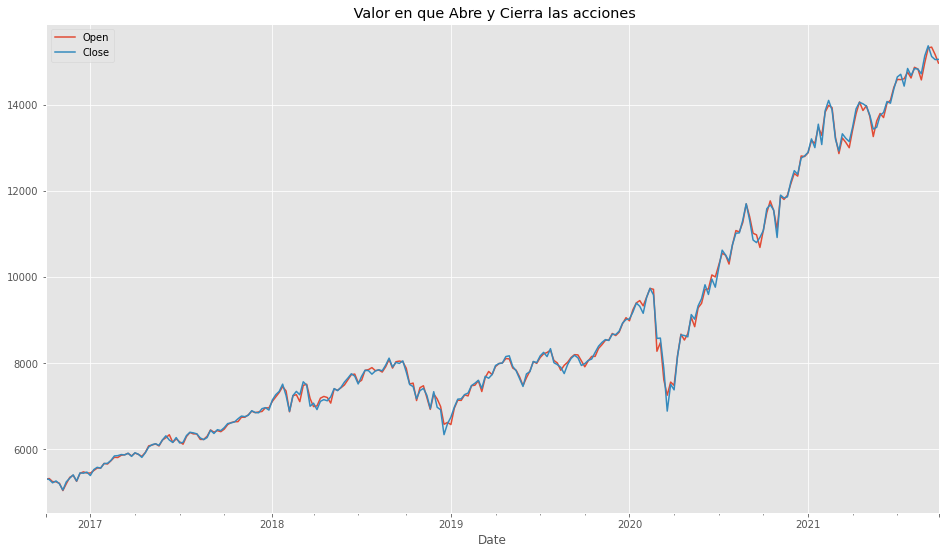

In [39]:
plot_stock('Open')
plot_stock('Close')
plt.title(' Valor en que Abre y Cierra las acciones')
plt.legend();

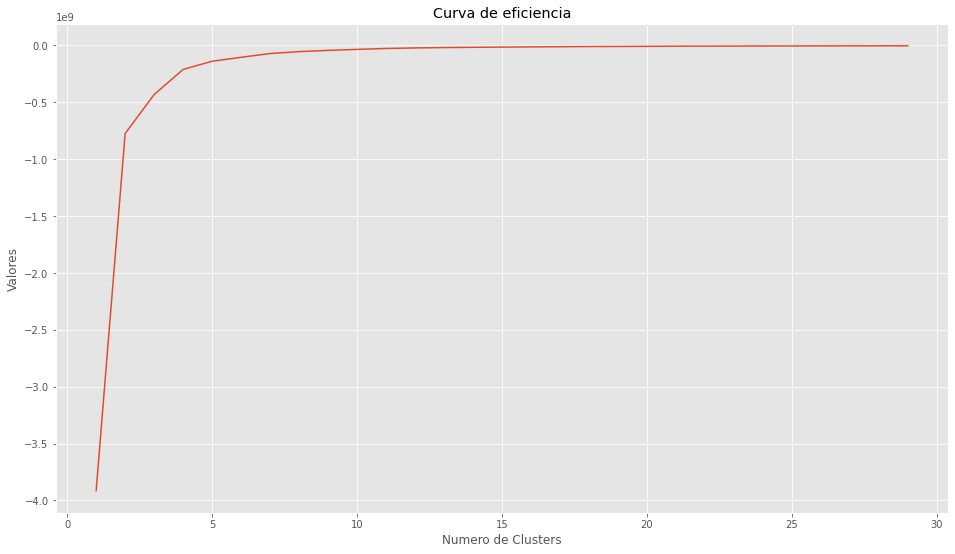

In [40]:
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(nasdaq_acciones).score(nasdaq_acciones) for i in range(len(kmeans))]
score
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.plot(nc,score)

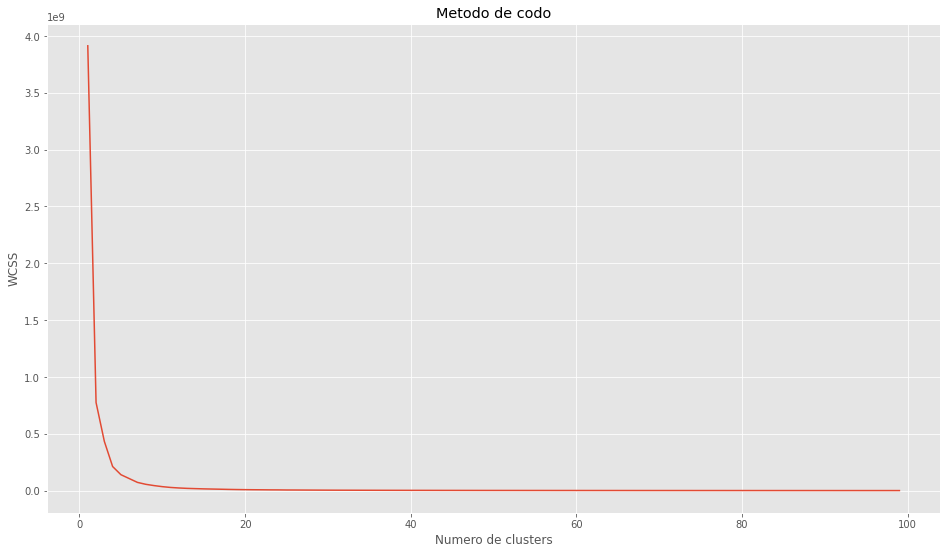

In [41]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(nasdaq_acciones)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Centroides
kmeans = KMeans(n_clusters=10).fit(nasdaq_acciones)
centroids = kmeans.cluster_centers_
print(centroids) 

[[ 9669.3366536   9623.56197933]
 [ 7227.20295273  7218.91787298]
 [13817.13398447 13844.5119792 ]
 [ 5550.97366533  5553.88701167]
 [11233.66272611 11218.05314563]
 [14823.60923557 14836.574986  ]
 [ 8643.85774744  8690.57438144]
 [ 6379.57182173  6381.83664776]
 [ 7926.02742988  7923.76685045]
 [12906.73470073 12932.27220053]]
